<center>Notebook-002</center>

<center><h1>EDA and Data Preprocessing</h1></center>

<center><h3>This notebook provides an exploratory data analysis on the arXiv datase</h3>
<h4>Exploratory Data Analysis (EDA) is the process of exploring a dataset and getting an understanding of its main characteristics. </h4></center>

![img](https://datos.gob.es/sites/default/files/u322/grafico.jpg)

## IMPORT LIBRARIES

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import ast

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import  Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# !pip install skimpy

<center><h3>Exploratory Data Analysis</h3></center>

## Load the data

In [7]:
PATH_DATA_BASE = Path.cwd().parent / "data"

In [8]:
pd.set_option('display.max_colwidth', None)
arxiv_data = pd.read_csv(PATH_DATA_BASE / "data.csv")

In [9]:
from skimpy import skim
skim(arxiv_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 135321 │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 5      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ titles                    │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ abstracts                 │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ terms                     │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ urls                      │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ ids                       │       0 │          0 │                          9.2 │                  1246029 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
skim(arxiv_data,header_style="italic magenta")

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 135321 │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 5      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ titles                    │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ abstracts                 │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ terms                     │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ urls                      │       0 │          0 │                          9.2 │                  1246029 │  │
│ │ ids                       │       0 │          0 │                          9.2 │                  1246029 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Top 5 Data

In [5]:
arxiv_data.head()

,titles,abstracts,terms,urls,ids
0,Point2Mask: Point-supervised Panoptic Segmentation via Optimal Transport,"Weakly-supervised image segmentation has recently attracted increasing\nresearch attentions, aiming to avoid the expensive pixel-wise labeling. In this\npaper, we present an effective method, namely Point2Mask, to achieve\nhigh-quality panoptic prediction using only a single random point annotation\nper target for training. Specifically, we formulate the panoptic pseudo-mask\ngeneration as an Optimal Transport (OT) problem, where each ground-truth (gt)\npoint label and pixel sample are defined as the label supplier and consumer,\nrespectively. The transportation cost is calculated by the introduced\ntask-oriented maps, which focus on the category-wise and instance-wise\ndifferences among the various thing and stuff targets. Furthermore, a\ncentroid-based scheme is proposed to set the accurate unit number for each gt\npoint supplier. Hence, the pseudo-mask generation is converted into finding the\noptimal transport plan at a globally minimal transportation cost, which can be\nsolved via the Sinkhorn-Knopp Iteration. Experimental results on Pascal VOC and\nCOCO demonstrate the promising performance of our proposed Point2Mask approach\nto point-supervised panoptic segmentation. Source code is available at:\nhttps://github.com/LiWentomng/Point2Mask.",['cs.CV'],http://arxiv.org/abs/2308.01779v1,2308.01779v1
1,Two Approaches to Supervised Image Segmentation,"Though performed almost effortlessly by humans, segmenting 2D gray-scale or\ncolor images in terms of regions of interest (e.g.~background, objects, or\nportions of objects) constitutes one of the greatest challenges in science and\ntechnology as a consequence of the involved dimensionality reduction(3D to 2D),\nnoise, reflections, shades, and occlusions, among many other possible effects.\nWhile a large number of interesting related approaches have been suggested\nalong the last decades, it was mainly thanks to the recent development of deep\nlearning that more effective and general solutions have been obtained,\ncurrently constituting the basic comparison reference for this type of\noperation. Also developed recently, a multiset-based methodology has been\ndescribed that is capable of encouraging image segmentation performance while\ncombining spatial accuracy, stability, and robustness while requiring little\ncomputational resources (hardware and/or training and recognition time). The\ninteresting features of the multiset neurons methodology mostly follow from the\nenhanced selectivity and sensitivity, as well as good robustness to data\nperturbations and outliers, allowed by the coincidence similarity index on\nwhich the multiset approach to supervised image segmentation is based. After\ndescribing the deep learning and multiset neurons approaches, the present work\ndevelops two comparison experiments between them which are primarily aimed at\nillustrating their respective main interesting features when applied to the\nadopted specific type of data and parameter configurations. While the deep\nlearning approach confirmed its potential for performing image segmentation,\nthe alternative multiset methodology allowed for enhanced accuracy while\nrequiring little computational resources.",['cs.CV'],http://arxiv.org/abs/2307.10123v2,2307.10123v2
2,Semi-Siamese Network for Robust Change Detection Across Different Domains with Applications to 3D Printing,"Automatic defect detection for 3D printing processes, which shares many\ncharacteristics with change detection problems, is a vital step for quality\ncontrol of 3D printed products. However, there are some critical challenges in\nthe current state of practice. First, existing methods for computer\nvision-based process monitoring typically work well only under specific camera\nviewpoints and lighting situations, requiring expensive pre-processing,\nalignment, and camera setups. Second, many defect detection techniques are\ns

### Length of the Data

In [6]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 135321 rows in the dataset.


### Checking the shape and size of the data

In [7]:
arxiv_data.size

676605

In [8]:
arxiv_data.shape

(135321, 5)

### Data Info


In [9]:
arxiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135321 entries, 0 to 135320
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   titles     135321 non-null  object
 1   abstracts  135321 non-null  object
 2   terms      135321 non-null  object
 3   urls       135321 non-null  object
 4   ids        135321 non-null  object
dtypes: object(5)
memory usage: 5.2+ MB


<h4>Observation:</h4>
<h5>The data has 93805 rows and 5 columns, which means there are 93805 research papers in the dataset. The data takes about 3.6 MB of memory, which is not too large. Each column takes about 750 KB of memory, except for the index which takes only 128 bytes.</h5>

###  Checking the data types and missing values

### Check for null values

In [10]:
arxiv_data.isnull().sum()

titles       0
abstracts    0
terms        0
urls         0
ids          0
dtype: int64

### Observation: 
- `The data types of all the columns are object, which means they are strings.`
- `There are no missing values in the data, which is good. `
- `We don’t need to deal with any imputation or deletion of null values`.

### Note 
- The `'terms'` column is a string representation of a list. We are converting it to a list using the `ast.literal_eval `function.

In [11]:
arxiv_data['terms'] = arxiv_data['terms'].apply(ast.literal_eval)
arxiv_data.head()

,titles,abstracts,terms,urls,ids
0,Point2Mask: Point-supervised Panoptic Segmentation via Optimal Transport,"Weakly-supervised image segmentation has recently attracted increasing\nresearch attentions, aiming to avoid the expensive pixel-wise labeling. In this\npaper, we present an effective method, namely Point2Mask, to achieve\nhigh-quality panoptic prediction using only a single random point annotation\nper target for training. Specifically, we formulate the panoptic pseudo-mask\ngeneration as an Optimal Transport (OT) problem, where each ground-truth (gt)\npoint label and pixel sample are defined as the label supplier and consumer,\nrespectively. The transportation cost is calculated by the introduced\ntask-oriented maps, which focus on the category-wise and instance-wise\ndifferences among the various thing and stuff targets. Furthermore, a\ncentroid-based scheme is proposed to set the accurate unit number for each gt\npoint supplier. Hence, the pseudo-mask generation is converted into finding the\noptimal transport plan at a globally minimal transportation cost, which can be\nsolved via the Sinkhorn-Knopp Iteration. Experimental results on Pascal VOC and\nCOCO demonstrate the promising performance of our proposed Point2Mask approach\nto point-supervised panoptic segmentation. Source code is available at:\nhttps://github.com/LiWentomng/Point2Mask.",[cs.CV],http://arxiv.org/abs/2308.01779v1,2308.01779v1
1,Two Approaches to Supervised Image Segmentation,"Though performed almost effortlessly by humans, segmenting 2D gray-scale or\ncolor images in terms of regions of interest (e.g.~background, objects, or\nportions of objects) constitutes one of the greatest challenges in science and\ntechnology as a consequence of the involved dimensionality reduction(3D to 2D),\nnoise, reflections, shades, and occlusions, among many other possible effects.\nWhile a large number of interesting related approaches have been suggested\nalong the last decades, it was mainly thanks to the recent development of deep\nlearning that more effective and general solutions have been obtained,\ncurrently constituting the basic comparison reference for this type of\noperation. Also developed recently, a multiset-based methodology has been\ndescribed that is capable of encouraging image segmentation performance while\ncombining spatial accuracy, stability, and robustness while requiring little\ncomputational resources (hardware and/or training and recognition time). The\ninteresting features of the multiset neurons methodology mostly follow from the\nenhanced selectivity and sensitivity, as well as good robustness to data\nperturbations and outliers, allowed by the coincidence similarity index on\nwhich the multiset approach to supervised image segmentation is based. After\ndescribing the deep learning and multiset neurons approaches, the present work\ndevelops two comparison experiments between them which are primarily aimed at\nillustrating their respective main interesting features when applied to the\nadopted specific type of data and parameter configurations. While the deep\nlearning approach confirmed its potential for performing image segmentation,\nthe alternative multiset methodology allowed for enhanced accuracy while\nrequiring little computational resources.",[cs.CV],http://arxiv.org/abs/2307.10123v2,2307.10123v2
2,Semi-Siamese Network for Robust Change Detection Across Different Domains with Applications to 3D Printing,"Automatic defect detection for 3D printing processes, which shares many\ncharacteristics with change detection problems, is a vital step for quality\ncontrol of 3D printed products. However, there are some critical challenges in\nthe current state of practice. First, existing methods for computer\nvision-based process monitoring typically work well only under specific camera\nviewpoints and lighting situations, requiring expensive pre-processing,\nalignment, and camera setups. Second, many defect detection techniques are\nspeci

### Distribution of Terms

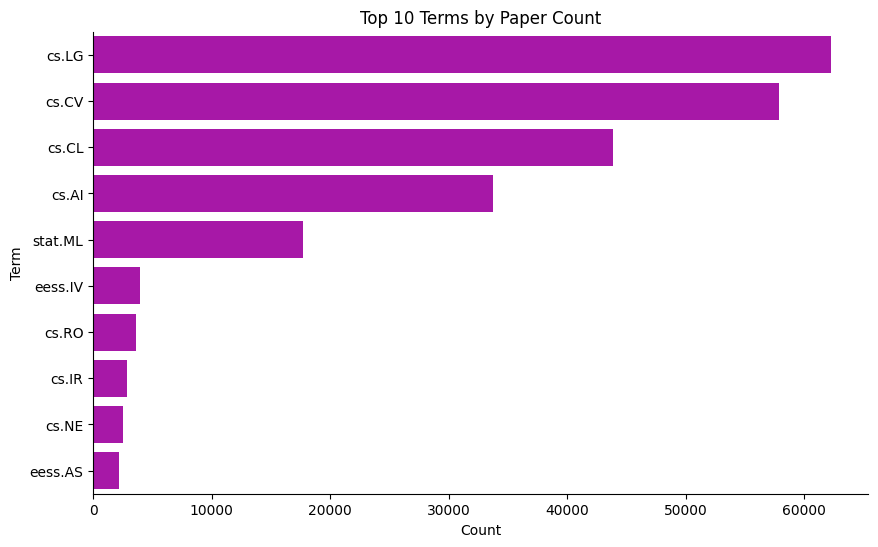

In [12]:
# Get all terms
all_terms = [term for sublist in arxiv_data['terms'].tolist() for term in sublist]

# Count terms
terms_count = Counter(all_terms)

# Create dataframe
df_terms = pd.DataFrame.from_dict(terms_count, orient='index').reset_index()
df_terms.columns = ['Term', 'Count']

# Sort by count and take the top 10
df_terms_top10 = df_terms.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Term', data=df_terms_top10, color='m' , saturation=0.75)

# Remove top and right spines
sns.despine()

plt.title('Top 10 Terms by Paper Count')
plt.show()

## Check for Duplicates

In [13]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 47837 duplicate titles.


`Real-world data is noisy. One of the most commonly observed source of noise is data duplication. Here we notice that our initial dataset has got about 48k duplicate entries.`

## Word Cloud of Titles

In [14]:
# !pip install wordcloud

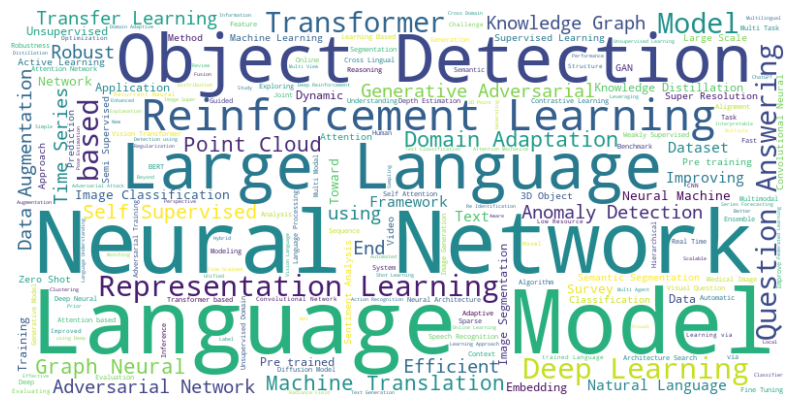

In [15]:
from wordcloud import WordCloud

# Concatenate all titles
all_titles = ' '.join(arxiv_data['titles'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400).generate(all_titles)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Lets drop the duplicate value and proceed

In [16]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()] #  It returns a new DataFrame that only contains the rows that are not duplicates.

print(f"Now there are {len(arxiv_data)}  rows in the dataset")

Now there are 87484  rows in the dataset


In [17]:
save_data = arxiv_data.copy()


<CENTER><h1>Approaches</h1>

<h2>We will be testing two approaches to recommend papers to a user.</h2>

<h4>1. The first approach is a content-based approach, where we will be recommending papers based on the similarity of their titles.</h4>
<h4>2. The second approach is also a content-based approach but we will be recommending papers based on the similarity of their abstract.</h4></CENTER>

# 1. CONTENT BASED APPROACH USING TITLES

### Lets begin exploring the first approach 

#### Since we are using Titles to reccomend the similar paper we will be droping rest of the columns from the data

In [18]:
titles_dataset = save_data.drop(columns=['abstracts'])

In [19]:
titles_dataset.head(10)

,titles,terms,urls,ids
0,Point2Mask: Point-supervised Panoptic Segmentation via Optimal Transport,[cs.CV],http://arxiv.org/abs/2308.01779v1,2308.01779v1
1,Two Approaches to Supervised Image Segmentation,[cs.CV],http://arxiv.org/abs/2307.10123v2,2307.10123v2
2,Semi-Siamese Network for Robust Change Detection Across Different Domains with Applications to 3D Printing,[cs.CV],http://arxiv.org/abs/2212.08583v2,2212.08583v2
3,Data-Centric Diet: Effective Multi-center Dataset Pruning for Medical Image Segmentation,"[cs.CV, cs.AI]",http://arxiv.org/abs/2308.01189v1,2308.01189v1
4,Prompt-Based Tuning of Transformer Models for Multi-Center Medical Image Segmentation of Head and Neck Cancer,[cs.CV],http://arxiv.org/abs/2305.18948v2,2305.18948v2
5,Training-Free Instance Segmentation from Semantic Image Segmentation Masks,[cs.CV],http://arxiv.org/abs/2308.00949v1,2308.00949v1
6,Differential Privacy for Adaptive Weight Aggregation in Federated Tumor Segmentation,"[cs.LG, cs.CR, eess.IV]",http://arxiv.org/abs/2308.00856v1,2308.00856v1
7,Multispectral Image Segmentation in Agriculture: A Comprehensive Study on Fusion Approaches,[cs.CV],http://arxiv.org/abs/2308.00159v1,2308.00159v1
8,Investigating and Improving Latent Density Segmentation Models for Aleatoric Uncertainty Quantification in Medical Imaging,[cs.CV],http://arxiv.org/abs/2307.16694v1,2307.16694v1
9,DiffPose: SpatioTemporal Diffusion Model for Video-Based Human Pose Estimation,[cs.CV],http://arxiv.org/abs/2307.16687v1,2307.16687v1


### Length of the titles

In [20]:
title_lengths = [len(title) for title in titles_dataset['titles']]

max_length = max(title_lengths)
min_length = min(title_lengths)
avg_length = sum(title_lengths) / len(title_lengths)


print(f"The maximum length of the title is: {max_length}")
print(50*'-')
print(f"The minimum length of the title is: {min_length}")
print(50*'-')
print(f"The average length of the titles is: {avg_length}")


The maximum length of the title is: 232
--------------------------------------------------
The minimum length of the title is: 7
--------------------------------------------------
The average length of the titles is: 74.05953088564766


### Function for plotting

In [21]:
def plot_length_distribution(df, column_name) -> None:
    """
    Plots a histogram representing the distribution of lengths in a specified column of a DataFrame. 
    The histogram also displays the mean length and one standard deviation above and below the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column in the DataFrame for which to plot the length distribution.

    Returns:
        None. This function outputs a plot.
    """
    
    # Compute the lengths of all titles
    title_lengths = df[column_name].apply(len)

    # Calculate mean and standard deviation
    mean_length = title_lengths.mean()
    std_length = title_lengths.std()

    # Plot the histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(title_lengths, bins=50, color='b', alpha=0.2)

    # Add lines for the mean and standard deviation
    plt.axvline(mean_length, color='r', linestyle='-', linewidth=1.5)
    plt.axvline(mean_length - std_length, color='gray',
                linestyle='--', linewidth=1)
    plt.axvline(mean_length + std_length, color='gray',
                linestyle='--', linewidth=1)

    # Add a text box with the mean value
    plt.text(mean_length+5, plt.gca().get_ylim()
             [1]*0.9, f"Mean: {mean_length:.2f}", fontsize=10)

    plt.title('Distribution of ' + column_name.capitalize() + ' Lengths')
    plt.xlabel(column_name.capitalize() + ' Length')
    plt.ylabel('Frequency')
    plt.legend(['Mean', 'Standard Deviation'])
    plt.show()

In [22]:
def plot_top_words(df, column_name) -> None:
    """
    Plot the top 10 most common words in a specified column of a DataFrame.

    The function tokenizes the strings, converts to lower case, removes non-alphabetic tokens 
    and stop words, counts the frequency of each word, and then plots the 10 most common words 
    using a horizontal bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column of the DataFrame to analyze.

    Returns:
        None. The function shows a plot.
    """
    
    # Create a single string containing all sentences
    all_setences= " ".join(df[column_name].values)

    # Tokenize the string
    tokens = word_tokenize(all_setences)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove non-alphabetic tokens and stop words
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Count the frequency of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common = counter.most_common(10)

    # Create a DataFrame from the most common words
    most_common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    # Plot the results using seaborn
    plt.figure(figsize=(12,6))
    sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')
    
    # Change font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.title(f'Top 10 Words in {column_name} column', fontsize=16)
    plt.show()

### Distribution of Titles

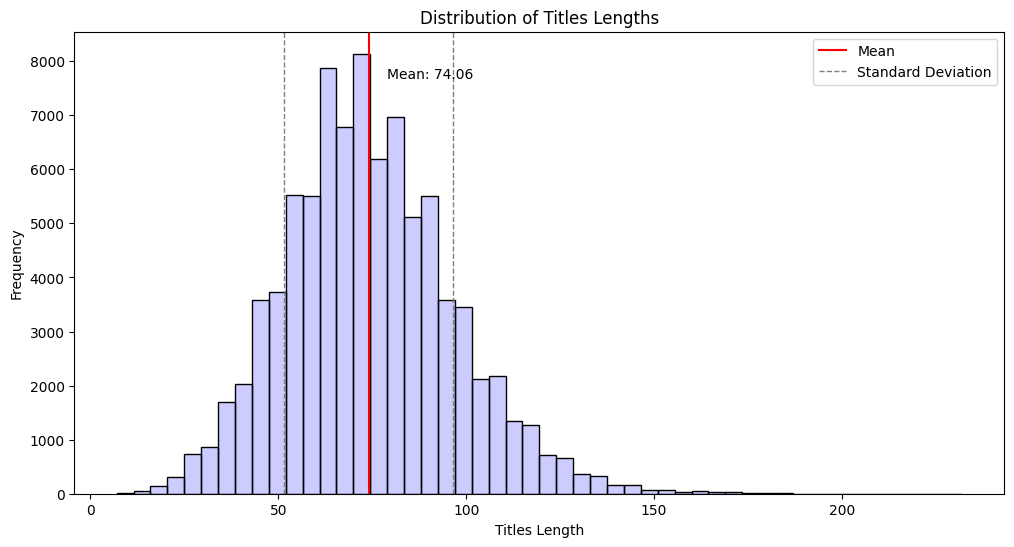

In [23]:
plot_length_distribution(titles_dataset, 'titles')

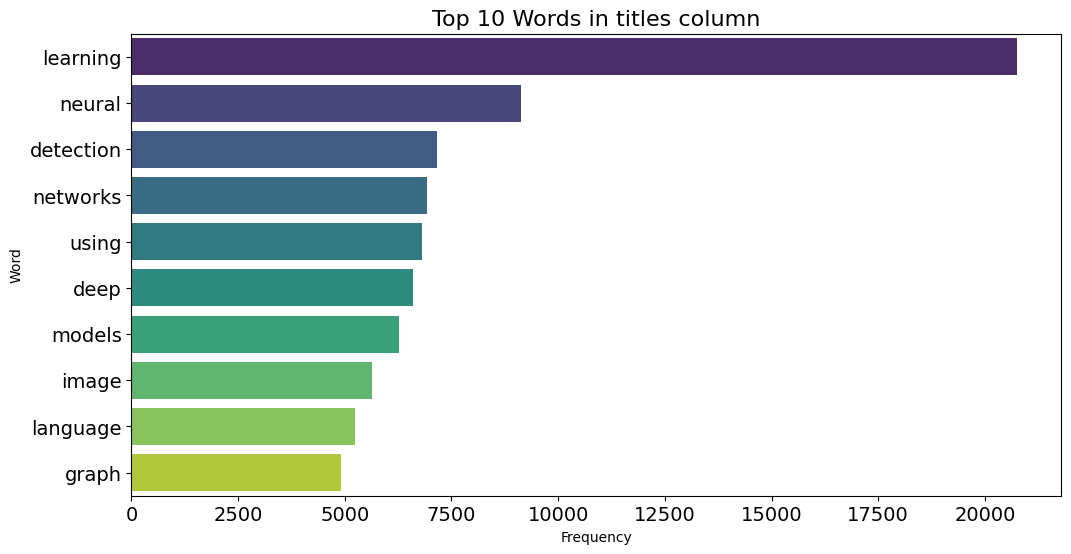

In [24]:
plot_top_words(titles_dataset, 'titles')

# 2. CONTENT BASED APPROACH USING ABSTRACTS

##### Since we are using abstracts , we will be droping titles columns 

In [25]:
abstracts_dataset = save_data.drop(columns=['titles'])

In [26]:
abstracts_dataset.head(10)

,abstracts,terms,urls,ids
0,"Weakly-supervised image segmentation has recently attracted increasing\nresearch attentions, aiming to avoid the expensive pixel-wise labeling. In this\npaper, we present an effective method, namely Point2Mask, to achieve\nhigh-quality panoptic prediction using only a single random point annotation\nper target for training. Specifically, we formulate the panoptic pseudo-mask\ngeneration as an Optimal Transport (OT) problem, where each ground-truth (gt)\npoint label and pixel sample are defined as the label supplier and consumer,\nrespectively. The transportation cost is calculated by the introduced\ntask-oriented maps, which focus on the category-wise and instance-wise\ndifferences among the various thing and stuff targets. Furthermore, a\ncentroid-based scheme is proposed to set the accurate unit number for each gt\npoint supplier. Hence, the pseudo-mask generation is converted into finding the\noptimal transport plan at a globally minimal transportation cost, which can be\nsolved via the Sinkhorn-Knopp Iteration. Experimental results on Pascal VOC and\nCOCO demonstrate the promising performance of our proposed Point2Mask approach\nto point-supervised panoptic segmentation. Source code is available at:\nhttps://github.com/LiWentomng/Point2Mask.",[cs.CV],http://arxiv.org/abs/2308.01779v1,2308.01779v1
1,"Though performed almost effortlessly by humans, segmenting 2D gray-scale or\ncolor images in terms of regions of interest (e.g.~background, objects, or\nportions of objects) constitutes one of the greatest challenges in science and\ntechnology as a consequence of the involved dimensionality reduction(3D to 2D),\nnoise, reflections, shades, and occlusions, among many other possible effects.\nWhile a large number of interesting related approaches have been suggested\nalong the last decades, it was mainly thanks to the recent development of deep\nlearning that more effective and general solutions have been obtained,\ncurrently constituting the basic comparison reference for this type of\noperation. Also developed recently, a multiset-based methodology has been\ndescribed that is capable of encouraging image segmentation performance while\ncombining spatial accuracy, stability, and robustness while requiring little\ncomputational resources (hardware and/or training and recognition time). The\ninteresting features of the multiset neurons methodology mostly follow from the\nenhanced selectivity and sensitivity, as well as good robustness to data\nperturbations and outliers, allowed by the coincidence similarity index on\nwhich the multiset approach to supervised image segmentation is based. After\ndescribing the deep learning and multiset neurons approaches, the present work\ndevelops two comparison experiments between them which are primarily aimed at\nillustrating their respective main interesting features when applied to the\nadopted specific type of data and parameter configurations. While the deep\nlearning approach confirmed its potential for performing image segmentation,\nthe alternative multiset methodology allowed for enhanced accuracy while\nrequiring little computational resources.",[cs.CV],http://arxiv.org/abs/2307.10123v2,2307.10123v2
2,"Automatic defect detection for 3D printing processes, which shares many\ncharacteristics with change detection problems, is a vital step for quality\ncontrol of 3D printed products. However, there are some critical challenges in\nthe current state of practice. First, existing methods for computer\nvision-based process monitoring typically work well only under specific camera\nviewpoints and lighting situations, requiring expensive pre-processing,\nalignment, and camera setups. Second, many defect detection techniques are\nspecific to pre-defined defect patterns and/or print schematics. In this work,\nwe approach the defect detection problem using a novel Semi-Siamese deep\nlearning model that directly compares a reference schematic of the desired\nprint and 

#### LENGTH OF THE ABSTRACTS

In [27]:
abstracts_dataset['abstract_length'] = abstracts_dataset['abstracts'].apply(len)
print(f"The length of the abstract is : {len(abstracts_dataset)}")

The length of the abstract is : 87484


In [28]:
abstracts_length = pd.DataFrame(abstracts_dataset['abstract_length'])

#### Also removing from the original dataset where abstract length > 2700

In [30]:
# Filter rows where abstract_length is greater than 2700
filtered_abstracts = abstracts_length[abstracts_length['abstract_length'] <= 2700]
len(filtered_abstracts)

87480

In [40]:
arxiv_data.drop(index = 56909 , inplace=True)
arxiv_data.drop(index = 75557 , inplace=True)
arxiv_data.drop(index = 92033 , inplace=True)
arxiv_data.drop(index = 107063 , inplace=True)


### Min | Max Length of the abstracts

In [31]:
minimum_length = abstracts_dataset['abstract_length'].min()
maximum_length = abstracts_dataset['abstract_length'].max()

print('The minimum length of an abstract:', minimum_length)
print('The maximum length of an abstract:', maximum_length)

The minimum length of an abstract: 39
The maximum length of an abstract: 3309


In [32]:
average_abstract_length = int(abstracts_dataset['abstracts'].apply(len).mean())
print(f"The average text length of an abstract is {average_abstract_length} characters.")

The average text length of an abstract is 1198 characters.


In [33]:
abstracts_dataset.head()

,abstracts,terms,urls,ids,abstract_length
0,"Weakly-supervised image segmentation has recently attracted increasing\nresearch attentions, aiming to avoid the expensive pixel-wise labeling. In this\npaper, we present an effective method, namely Point2Mask, to achieve\nhigh-quality panoptic prediction using only a single random point annotation\nper target for training. Specifically, we formulate the panoptic pseudo-mask\ngeneration as an Optimal Transport (OT) problem, where each ground-truth (gt)\npoint label and pixel sample are defined as the label supplier and consumer,\nrespectively. The transportation cost is calculated by the introduced\ntask-oriented maps, which focus on the category-wise and instance-wise\ndifferences among the various thing and stuff targets. Furthermore, a\ncentroid-based scheme is proposed to set the accurate unit number for each gt\npoint supplier. Hence, the pseudo-mask generation is converted into finding the\noptimal transport plan at a globally minimal transportation cost, which can be\nsolved via the Sinkhorn-Knopp Iteration. Experimental results on Pascal VOC and\nCOCO demonstrate the promising performance of our proposed Point2Mask approach\nto point-supervised panoptic segmentation. Source code is available at:\nhttps://github.com/LiWentomng/Point2Mask.",[cs.CV],http://arxiv.org/abs/2308.01779v1,2308.01779v1,1249
1,"Though performed almost effortlessly by humans, segmenting 2D gray-scale or\ncolor images in terms of regions of interest (e.g.~background, objects, or\nportions of objects) constitutes one of the greatest challenges in science and\ntechnology as a consequence of the involved dimensionality reduction(3D to 2D),\nnoise, reflections, shades, and occlusions, among many other possible effects.\nWhile a large number of interesting related approaches have been suggested\nalong the last decades, it was mainly thanks to the recent development of deep\nlearning that more effective and general solutions have been obtained,\ncurrently constituting the basic comparison reference for this type of\noperation. Also developed recently, a multiset-based methodology has been\ndescribed that is capable of encouraging image segmentation performance while\ncombining spatial accuracy, stability, and robustness while requiring little\ncomputational resources (hardware and/or training and recognition time). The\ninteresting features of the multiset neurons methodology mostly follow from the\nenhanced selectivity and sensitivity, as well as good robustness to data\nperturbations and outliers, allowed by the coincidence similarity index on\nwhich the multiset approach to supervised image segmentation is based. After\ndescribing the deep learning and multiset neurons approaches, the present work\ndevelops two comparison experiments between them which are primarily aimed at\nillustrating their respective main interesting features when applied to the\nadopted specific type of data and parameter configurations. While the deep\nlearning approach confirmed its potential for performing image segmentation,\nthe alternative multiset methodology allowed for enhanced accuracy while\nrequiring little computational resources.",[cs.CV],http://arxiv.org/abs/2307.10123v2,2307.10123v2,1795
2,"Automatic defect detection for 3D printing processes, which shares many\ncharacteristics with change detection problems, is a vital step for quality\ncontrol of 3D printed products. However, there are some critical challenges in\nthe current state of practice. First, existing methods for computer\nvision-based process monitoring typically work well only under specific camera\nviewpoints and lighting situations, requiring expensive pre-processing,\nalignment, and camera setups. Second, many defect detection techniques are\nspecific to pre-defined defect patterns and/or print schematics. In this work,\nwe approach the defect detection problem using a novel Semi-Siamese deep\nlearning model that directly compares a reference schematic 

In [34]:
# Find the maximum abstract length
max_length = abstracts_dataset['abstract_length'].max()

# Initialize a variable to store the second maximum abstract length
second_max_length = None

# Iterate through the abstract lengths
for length in abstracts_dataset['abstract_length']:
    # If the length is not the maximum length and it is greater than the second maximum length
    if length != max_length and (second_max_length is None or length > second_max_length):
        # Set the second maximum length to the length
        second_max_length = length

# Print the second maximum abstract length
print(f"The second maximum abstract length is: {second_max_length}")

The second maximum abstract length is: 3260


In [35]:
# Get the maximum abstract content
max_abstract = abstracts_dataset['abstracts'].max()

# Print the index of the maximum abstract content
for i in range(0, len(abstracts_dataset)):
    if abstracts_dataset['abstracts'].iloc[i] == max_abstract:
        print("Index- ", i)

Index-  61975


In [41]:
abstracts_dataset.drop(index = 56909 , inplace=True)
abstracts_dataset.drop(index = 75557 , inplace=True)
abstracts_dataset.drop(index = 92033 , inplace=True)
abstracts_dataset.drop(index = 107063 , inplace=True)

In [39]:
removed_indexes = abstracts_length.index[~abstracts_length.index.isin(filtered_abstracts.index)]
removed_indexes

Index([56909, 75557, 92033, 107063], dtype='int64')

### Min / Max after filtering

In [36]:
minimum_length = filtered_abstracts['abstract_length'].min()
maximum_length = filtered_abstracts['abstract_length'].max()

print('The minimum length of an abstract:', minimum_length)
print('The maximum length of an abstract:', maximum_length)

The minimum length of an abstract: 39
The maximum length of an abstract: 2573


In [37]:
average_abstract_length = int(abstracts_dataset['abstracts'].apply(len).mean())
print(f"The average text length of an abstract is {average_abstract_length} characters.")

The average text length of an abstract is 1198 characters.


In [38]:
filtered_abstracts = filtered_abstracts.sort_values(by="abstract_length", ascending=False)
filtered_abstracts.head()

,abstract_length
116511,2573
4088,2327
118448,2254
20709,2219
76145,2170


## Saved Filtered Data


In [50]:
arxiv_data.to_csv(PATH_DATA_BASE / 'Filtered_arxiv_papers.csv' ,index=False)

# Observations
- The average text length of an abstract is `1218 ` characters, and its maximum length is `2573` characters. So the best choice is to use a `sentence-transformer model` with a Max Sequence Length capability of over `2790` characters.

- Unfortunately, most pre-trained models have a Max Sequence Length of `512`. The transformer model just won't be able to process the entire abstract at once due to its max length constraint, so it processes as much as it can, which in this case is the first `512` words.

- A naive approach would be to split the document into chunks, encode each chunk separately and then combine these encodings for a final document-level representation. For example, split a document into sentences, encode each sentence independently and then combine these sentence vectors (e.g., averaging, max-pooling, etc.) for a document representation.

- Another approach would be to use a `"sliding window"`. Instead of just taking the first `512 words`, I could apply a `"sliding window"` approach where I first process the first `512` words, then the next `512` words (perhaps with some overlap), and so on until I've processed the whole abstract.


- I will first be encoding paper's titles to calculate the similarity. Abstracts will be encoded later on.